# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)

2.3.1


# Loading the data
* Gven dataset has training,validation and test set, but validation set has only 16 images whereas training set has 5216 images.
* So first we need to create a proper distribution set with 80% as training data and 20% as validation data.
* So we'll merge training and validation set and then split them in the ratio of 80:20 repectively.


In [4]:
BASE_DIR=('../input/chest-xray-pneumonia/chest_xray/')
train_dir=os.path.join(BASE_DIR,'train/')
val_dir=os.path.join(BASE_DIR,'val/')
test_dir=os.path.join(BASE_DIR,'test/')

print('Number of images in training set = ',str(len(glob(train_dir+'*/*'))))
print('Number of images in validation set = ',str(len(glob(val_dir+'*/*'))))
print('Number of images in testing set = ',str(len(glob(test_dir+'*/*'))))


Number of images in training set =  5216
Number of images in validation set =  16
Number of images in testing set =  624


In [5]:
training_images = tf.io.gfile.glob('../input/chest-xray-pneumonia/chest_xray/train/*/*')
validation_images = tf.io.gfile.glob('../input/chest-xray-pneumonia/chest_xray/val/*/*')


total_files = training_images
total_files.extend(validation_images)
print(f'Total number of images : training_images + validation_images = {len(total_files)}\n')

#spliting 80:20
train_images, val_images = train_test_split(total_files, test_size = 0.2)
print(f'After division of 80:20')
print(f'Total number of training images = {len(train_images)}')
print(f'Total number of validation images = {len(val_images)}')

Total number of images : training_images + validation_images = 5232

After division of 80:20
Total number of training images = 4185
Total number of validation images = 1047


## Making new directories for training set and validation set

In [6]:
tf.io.gfile.makedirs('/kaggle/working/val_dataset/NORMAL/')
tf.io.gfile.makedirs('/kaggle/working/val_dataset/PNEUMONIA/')
tf.io.gfile.makedirs('/kaggle/working/train_dataset/NORMAL/')
tf.io.gfile.makedirs('/kaggle/working/train_dataset/PNEUMONIA/')

## Copying the images in new directories 

In [7]:
for ele in train_images:
    parts_of_path = ele.split('/')

    if 'PNEUMONIA' == parts_of_path[-2]:
        tf.io.gfile.copy(src = ele, dst = '/kaggle/working/train_dataset/PNEUMONIA/' +  parts_of_path[-1])
    else:
        tf.io.gfile.copy(src = ele, dst = '/kaggle/working/train_dataset/NORMAL/' +  parts_of_path[-1])

In [8]:
for ele in val_images:
    parts_of_path = ele.split('/')

    if 'PNEUMONIA' == parts_of_path[-2]:
        tf.io.gfile.copy(src = ele, dst = '/kaggle/working/val_dataset/PNEUMONIA/' +  parts_of_path[-1])
    else:
        tf.io.gfile.copy(src = ele, dst = '/kaggle/working/val_dataset/NORMAL/' +  parts_of_path[-1])

In [9]:
print('Pneumonia x-ray images in training set after split = ',len(os.listdir('/kaggle/working/train_dataset/PNEUMONIA/')))
print('Normal x-ray images in training set after split = ',len(os.listdir('/kaggle/working/train_dataset/NORMAL/')))
print('Pneumonia x-ray images in validation set after split = ',len(os.listdir('/kaggle/working/val_dataset/PNEUMONIA/')))
print('Normal x-ray images in validation set after split = ',len(os.listdir('/kaggle/working/val_dataset/NORMAL/')))
print('Pneumonia x-ray images in test set = ',len(os.listdir('../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/')))
print('Normal x-ray images in test set = ',len(os.listdir('../input/chest-xray-pneumonia/chest_xray/test/NORMAL')))


Pneumonia x-ray images in training set after split =  3100
Normal x-ray images in training set after split =  1085
Pneumonia x-ray images in validation set after split =  783
Normal x-ray images in validation set after split =  264
Pneumonia x-ray images in test set =  390
Normal x-ray images in test set =  234


## Setting the path of training directory and validation directory

In [10]:
train_dir='/kaggle/working/train_dataset/'
val_dir='/kaggle/working/val_dataset/'
test_dir='../input/chest-xray-pneumonia/chest_xray/test/'

train_normal_dir='/kaggle/working/train_dataset/NORMAL'
train_pneumonia_dir='/kaggle/working/train_dataset/PNEUMONIA'
val_normal_dir='/kaggle/working/val_dataset/NORMAL'
val_pneumonia_dir='/kaggle/working/val_dataset/PNEUMONIA'


In [11]:
train_normal_fnames=os.listdir(train_normal_dir)
train_pneumonia_fnames=os.listdir(train_pneumonia_dir)

print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])


['IM-0646-0001.jpeg', 'IM-0504-0001.jpeg', 'NORMAL2-IM-0995-0001.jpeg', 'IM-0540-0001.jpeg', 'NORMAL2-IM-0630-0001.jpeg', 'NORMAL2-IM-1198-0001.jpeg', 'IM-0513-0001.jpeg', 'IM-0527-0001.jpeg', 'NORMAL2-IM-1345-0001-0001.jpeg', 'NORMAL2-IM-0924-0001.jpeg']
['person1345_bacteria_3426.jpeg', 'person789_virus_1420.jpeg', 'person1212_bacteria_3164.jpeg', 'person1642_bacteria_4353.jpeg', 'person1628_bacteria_4294.jpeg', 'person392_bacteria_1786.jpeg', 'person1546_bacteria_4045.jpeg', 'person30_bacteria_157.jpeg', 'person1100_virus_1820.jpeg', 'person833_virus_1469.jpeg']


## Visualizing pneumonia x-ray images and normal x-ray images

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

no_cols=4
no_rows=4

pic_index=0

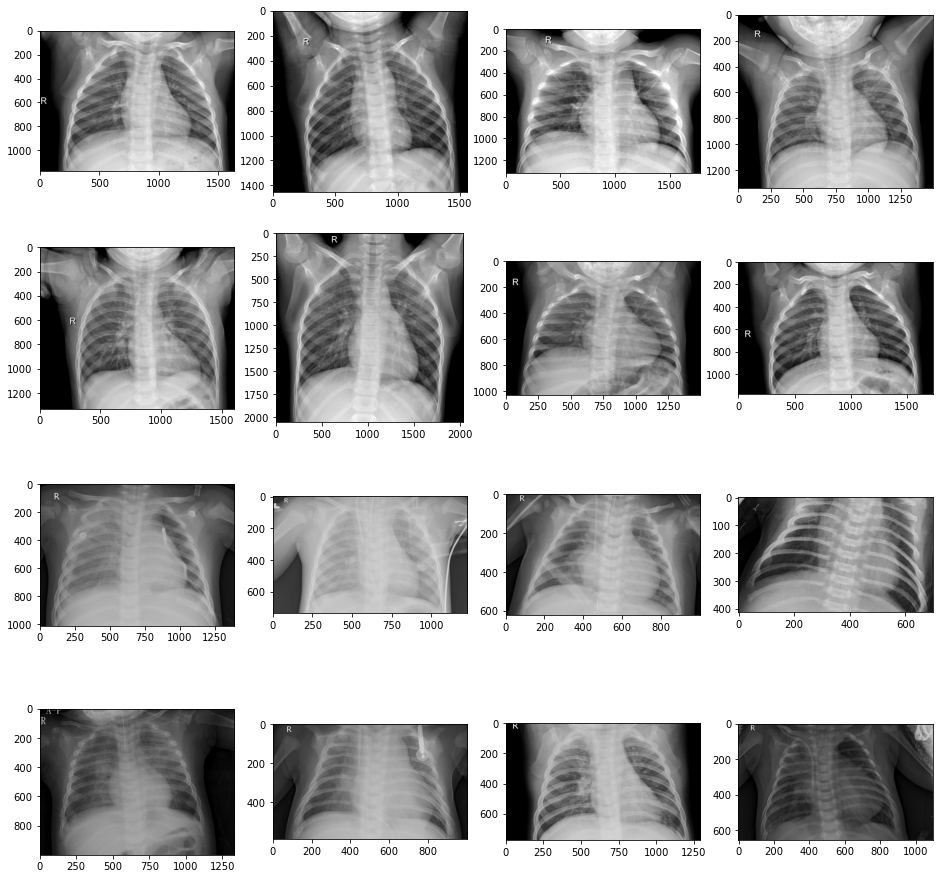

In [13]:
fig=plt.gcf()
fig.set_size_inches(no_cols*4,no_rows*4)

pic_index+=8

normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
pneumonia_pix=[os.path.join(train_pneumonia_dir,fname) for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(normal_pix+pneumonia_pix):
    sp=plt.subplot(no_rows,no_cols,i+1)
    sp.axis()
    
    img=mpimg.imread(img_path)
    plt.imshow(img,cmap='gray')
    
plt.show()

# first 8 images are normal x-ray images and next 8 images are pnemonia x-ray images

# Model 1
### First model which we are going to train is a simple CNN model.

In [14]:
model=tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        3

In [17]:


train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(train_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

val_generator=val_datagen.flow_from_directory(val_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,color_mode="grayscale",target_size=(180,180),batch_size=128,class_mode='binary')


Found 4185 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
history=model.fit(train_generator,validation_data=val_generator,epochs=30,verbose=2)

Epoch 1/30
33/33 - 59s - loss: 0.5687 - accuracy: 0.7326 - precision: 0.7466 - recall: 0.9674 - val_loss: 0.7151 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 2/30
33/33 - 58s - loss: 0.4649 - accuracy: 0.7472 - precision: 0.7718 - recall: 0.9352 - val_loss: 0.3583 - val_accuracy: 0.7937 - val_precision: 0.7867 - val_recall: 0.9936
Epoch 3/30
33/33 - 57s - loss: 0.3858 - accuracy: 0.8122 - precision: 0.8652 - recall: 0.8842 - val_loss: 0.2953 - val_accuracy: 0.8940 - val_precision: 0.9409 - val_recall: 0.9157
Epoch 4/30
33/33 - 56s - loss: 0.3819 - accuracy: 0.8196 - precision: 0.8647 - recall: 0.8968 - val_loss: 0.3210 - val_accuracy: 0.8615 - val_precision: 0.9878 - val_recall: 0.8250
Epoch 5/30
33/33 - 57s - loss: 0.3372 - accuracy: 0.8425 - precision: 0.8964 - recall: 0.8903 - val_loss: 0.3278 - val_accuracy: 0.8539 - val_precision: 0.9953 - val_recall: 0.8084
Epoch 6/30
33/33 - 55s - loss: 0.3323 - accuracy: 0.8485 - precision: 0.8993 - recall: 0.8958 -

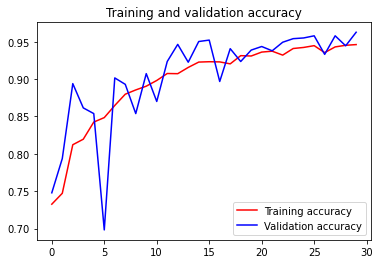

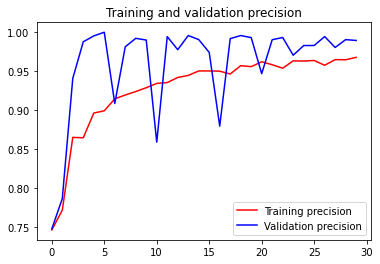

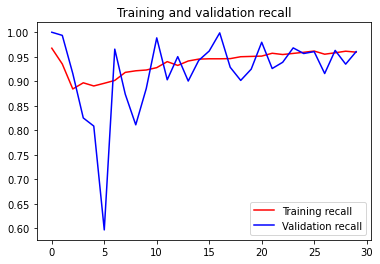

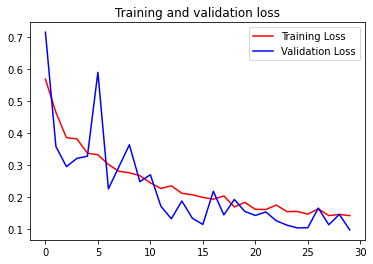

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_precision=history.history['precision']
val_precision=history.history['val_precision']

train_recall=history.history['recall']
val_recall=history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

plt.plot(epochs, train_recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
eval_result1 = model.evaluate_generator(test_generator, 624)
print('loss  :', eval_result1[0])
print('accuracy  :', eval_result1[1])
print('Precision :', eval_result1[2])
print('Recall :', eval_result1[3])

loss  : 0.41598594188690186
accuracy  : 0.8910256624221802
Precision : 0.859375
Recall : 0.9871794581413269


# Model 2 (ResNet-50)
 * We'll user pre-trained model provided by keras and add some layers on the top.
 * The pre-trained ResNet model in keras takes in input of exactly three input channel, but our input image is of grayscale.
 * So inorder to avoid mismatch of shape we'll let our Image data generator use the default color_mode ie rgb instead of specifying it to be gray_scale.

In [23]:
train_datagen2=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=30,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 )

val_datagen2=ImageDataGenerator(rescale=1.0/255)

test_datagen2=ImageDataGenerator(rescale=1.0/255)

train_generator2=train_datagen2.flow_from_directory(train_dir,target_size=(180,180),batch_size=128,class_mode='binary')

val_generator2=val_datagen2.flow_from_directory(val_dir,target_size=(180,180),batch_size=128,class_mode='binary')

test_generator2=test_datagen2.flow_from_directory(test_dir,target_size=(180,180),batch_size=128,class_mode='binary')


Found 4185 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Importing and loading pretrained ResNet50 model

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [28]:
pretrained_model2 = ResNet50(weights= 'imagenet', include_top=False, input_shape= (180,180,3))

#freazing the trained layers
for layers in pretrained_model2.layers:
    layers.trainable = False
#pretrained_model3.summary()

In [29]:
last_layer=pretrained_model2.get_layer('conv5_block3_1_relu')
last_output = last_layer.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2=tf.keras.Model(pretrained_model2.input,x)

model2.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])

#model3.summary()

In [30]:
history2=model2.fit(train_generator2,validation_data=val_generator2,epochs=30,verbose=2)


Epoch 1/30
33/33 - 82s - loss: 1.1911 - accuracy: 0.7020 - precision: 0.7386 - recall: 0.9252 - val_loss: 0.6348 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 2/30
33/33 - 79s - loss: 0.5922 - accuracy: 0.7376 - precision: 0.7403 - recall: 0.9948 - val_loss: 0.5739 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 3/30
33/33 - 80s - loss: 0.5804 - accuracy: 0.7410 - precision: 0.7411 - recall: 0.9994 - val_loss: 0.5695 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 4/30
33/33 - 78s - loss: 0.5727 - accuracy: 0.7407 - precision: 0.7407 - recall: 1.0000 - val_loss: 0.5341 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 5/30
33/33 - 77s - loss: 0.5565 - accuracy: 0.7407 - precision: 0.7407 - recall: 1.0000 - val_loss: 0.5373 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 6/30
33/33 - 79s - loss: 0.5386 - accuracy: 0.7407 - precision: 0.7407 - recall: 1.0000 -

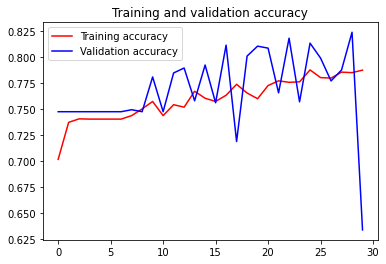

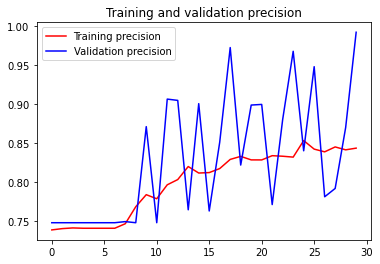

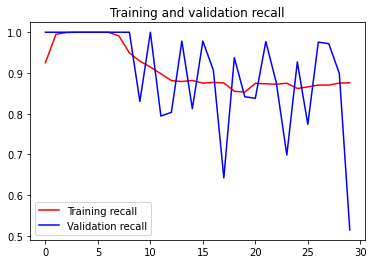

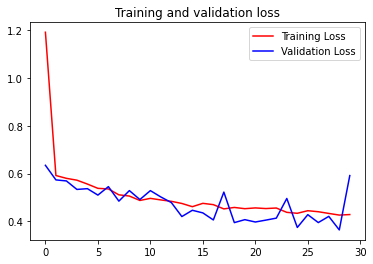

In [31]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

train_precision2=history2.history['precision']
val_precision2=history2.history['val_precision']

train_recall2=history2.history['recall']
val_recall2=history2.history['val_recall']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs = range(len(acc2))

plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision2, 'r', label='Training precision')
plt.plot(epochs, val_precision2, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall2, 'r', label='Training recall')
plt.plot(epochs, val_recall2, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss2, 'r', label='Training Loss')
plt.plot(epochs, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
eval_result2 = model2.evaluate_generator(test_generator2, 624)
print('loss  :', eval_result2[0])
print('accuracy  :', eval_result2[1])
print('Precision :', eval_result2[2])
print('Recall :', eval_result2[3])

loss  : 0.5993345975875854
accuracy  : 0.6650640964508057
Precision : 0.9414634108543396
Recall : 0.4948717951774597


 # Model 3 (Inception Model)
 
 * We'll user pre-trained model provided by keras and add some layers on the top.
 * The pre-trained Inception model in keras takes in input of exactly three input channel, but our input image is of grayscale.
 * So inorder to avoid mismatch of shape we'll let our Image data generator use the default color_mode ie rgb instead of specifying it to be gray_scale.
 * So we'll use same data generator as used in ResNet50 model

### Importing and loading pretrained Inception model

In [33]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [34]:
pretrained_model3=InceptionV3(input_shape=(180,180,3),
                             include_top=False,
                             weights='imagenet')
#freazing the trained layers
for layers in pretrained_model3.layers:
    layers.trainable=False
    

87916544/87910968 [==============================] - 2s 0us/step


In [35]:
last_layer=pretrained_model3.get_layer('mixed10')
last_output = last_layer.output

In [36]:
x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3=tf.keras.Model(pretrained_model3.input,x)

model3.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
               metrics=['accuracy','Precision','Recall'])
# model4.summary()


In [37]:
history3=model3.fit(train_generator2,validation_data=val_generator2,epochs=30,verbose=2)

Epoch 1/30
33/33 - 80s - loss: 14.6075 - accuracy: 0.6863 - precision: 0.7956 - recall: 0.7758 - val_loss: 0.6469 - val_accuracy: 0.6332 - val_precision: 0.9902 - val_recall: 0.5147
Epoch 2/30
33/33 - 77s - loss: 0.8522 - accuracy: 0.7830 - precision: 0.8464 - recall: 0.8639 - val_loss: 0.4670 - val_accuracy: 0.7851 - val_precision: 0.9878 - val_recall: 0.7216
Epoch 3/30
33/33 - 78s - loss: 0.5201 - accuracy: 0.8022 - precision: 0.8639 - recall: 0.8700 - val_loss: 0.7584 - val_accuracy: 0.7479 - val_precision: 0.7479 - val_recall: 1.0000
Epoch 4/30
33/33 - 77s - loss: 0.4311 - accuracy: 0.8404 - precision: 0.8838 - recall: 0.9032 - val_loss: 0.3368 - val_accuracy: 0.9226 - val_precision: 0.9291 - val_recall: 0.9706
Epoch 5/30
33/33 - 76s - loss: 0.4290 - accuracy: 0.8456 - precision: 0.8878 - recall: 0.9061 - val_loss: 0.2279 - val_accuracy: 0.9054 - val_precision: 0.8977 - val_recall: 0.9860
Epoch 6/30
33/33 - 78s - loss: 0.3636 - accuracy: 0.8648 - precision: 0.9020 - recall: 0.9171 

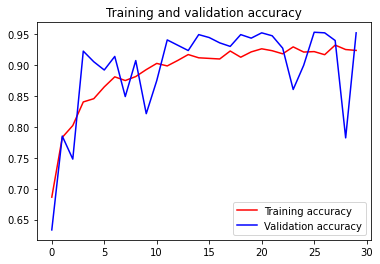

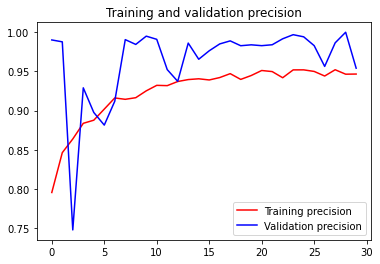

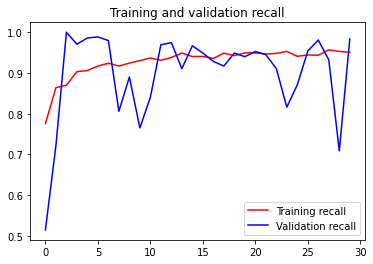

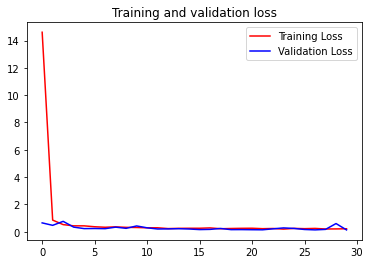

In [38]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

train_precision3=history3.history['precision']
val_precision3=history3.history['val_precision']

train_recall3=history3.history['recall']
val_recall3=history3.history['val_recall']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs = range(len(acc3))

plt.plot(epochs, acc3, 'r', label='Training accuracy')
plt.plot(epochs, val_acc3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_precision3, 'r', label='Training precision')
plt.plot(epochs, val_precision3, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.show()

plt.plot(epochs, train_recall3, 'r', label='Training recall')
plt.plot(epochs, val_recall3, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.legend()
plt.show()

plt.plot(epochs, loss3, 'r', label='Training Loss')
plt.plot(epochs, val_loss3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
eval_result3 = model3.evaluate_generator(test_generator2, 624)
print('loss  :', eval_result3[0])
print('accuracy  :', eval_result3[1])
print('Precision :', eval_result3[2])
print('Recall :', eval_result3[3])

loss  : 0.4493449330329895
accuracy  : 0.7916666865348816
Precision : 0.75390625
Recall : 0.9897435903549194


# Comparing the models
* As this is the case of medical diagnosis accuracy cannot be the oly metric to evaluate. In medical daignosis it is very important to correctly predict the true values. We cannot incorrectly diagnose a patient as normal event after the true report of diagnosis shows that patient has pnemonia.So along with higher accuracy we need higher recall.

### Model 1 performed best with accuracy=0.8766 and recall=0.9949 on test set so we'll save this model

In [40]:
model.save('PNP.h5')